#### Task is to predict whether an NBA Rookie will last >= 5 years in the leagus. Using Logistics Regression, GaussianNB and Neural Network

##### Note: Target column encoding 
1 == career >= 5 years <br>
0 career < 5years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, ListedColormap
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier

#### Data Cleaning and Preprocessing
1. Duplicates were removed
2. Null values dropped
3. Handled Outliers by winzorisation because Logistics and GNB are sensitive to outliers 

In [2]:
df = pd.read_csv('nba_rookie_data.csv')
df

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1340 non-null   object 
 1   Games Played         1340 non-null   int64  
 2   Minutes Played       1340 non-null   float64
 3   Points Per Game      1340 non-null   float64
 4   Field Goals Made     1340 non-null   float64
 5   Field Goal Attempts  1340 non-null   float64
 6   Field Goal Percent   1340 non-null   float64
 7   3 Point Made         1340 non-null   float64
 8   3 Point Attempt      1340 non-null   float64
 9   3 Point Percent      1329 non-null   float64
 10  Free Throw Made      1340 non-null   float64
 11  Free Throw Attempts  1340 non-null   float64
 12  Free Throw Percent   1340 non-null   float64
 13  Offensive Rebounds   1340 non-null   float64
 14  Defensive Rebounds   1340 non-null   float64
 15  Rebounds             1340 non-null   f

In [4]:
df.duplicated().sum()

12

In [5]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
162,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1
165,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1
168,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1
169,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1
242,Reggie Williams,35,24.5,10.4,4.3,12.2,35.6,0.4,1.7,22.4,...,1.9,72.7,1.6,1.8,3.4,1.7,0.8,0.6,1.8,1
243,Reggie Williams,35,24.5,10.4,4.3,12.2,35.6,0.4,1.7,22.4,...,1.9,72.7,1.6,1.8,3.4,1.7,0.8,0.6,1.8,1
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0


In [6]:
# drop duplicates
df = df.drop_duplicates()
df

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [7]:
df.isna().sum()

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        10
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df = df.drop(['Name'], axis =1)

In [10]:
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,60.402124,17.654249,6.821017,2.635357,5.900910,44.138998,0.249621,0.784598,19.322989,1.302731,1.827162,70.412822,1.008194,2.023596,3.030956,1.558801,0.620637,0.366161,1.195827,0.621396
std,17.457767,8.340224,4.368868,1.687763,3.600133,6.116819,0.385397,1.065365,16.045404,0.989255,1.325931,10.494442,0.779410,1.364257,2.064212,1.478618,0.411766,0.429008,0.725690,0.485223
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.825000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,44.000000,0.100000,0.300000,22.450000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.975000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.575000,1.700000,2.300000,77.600000,1.400000,2.600000,3.975000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


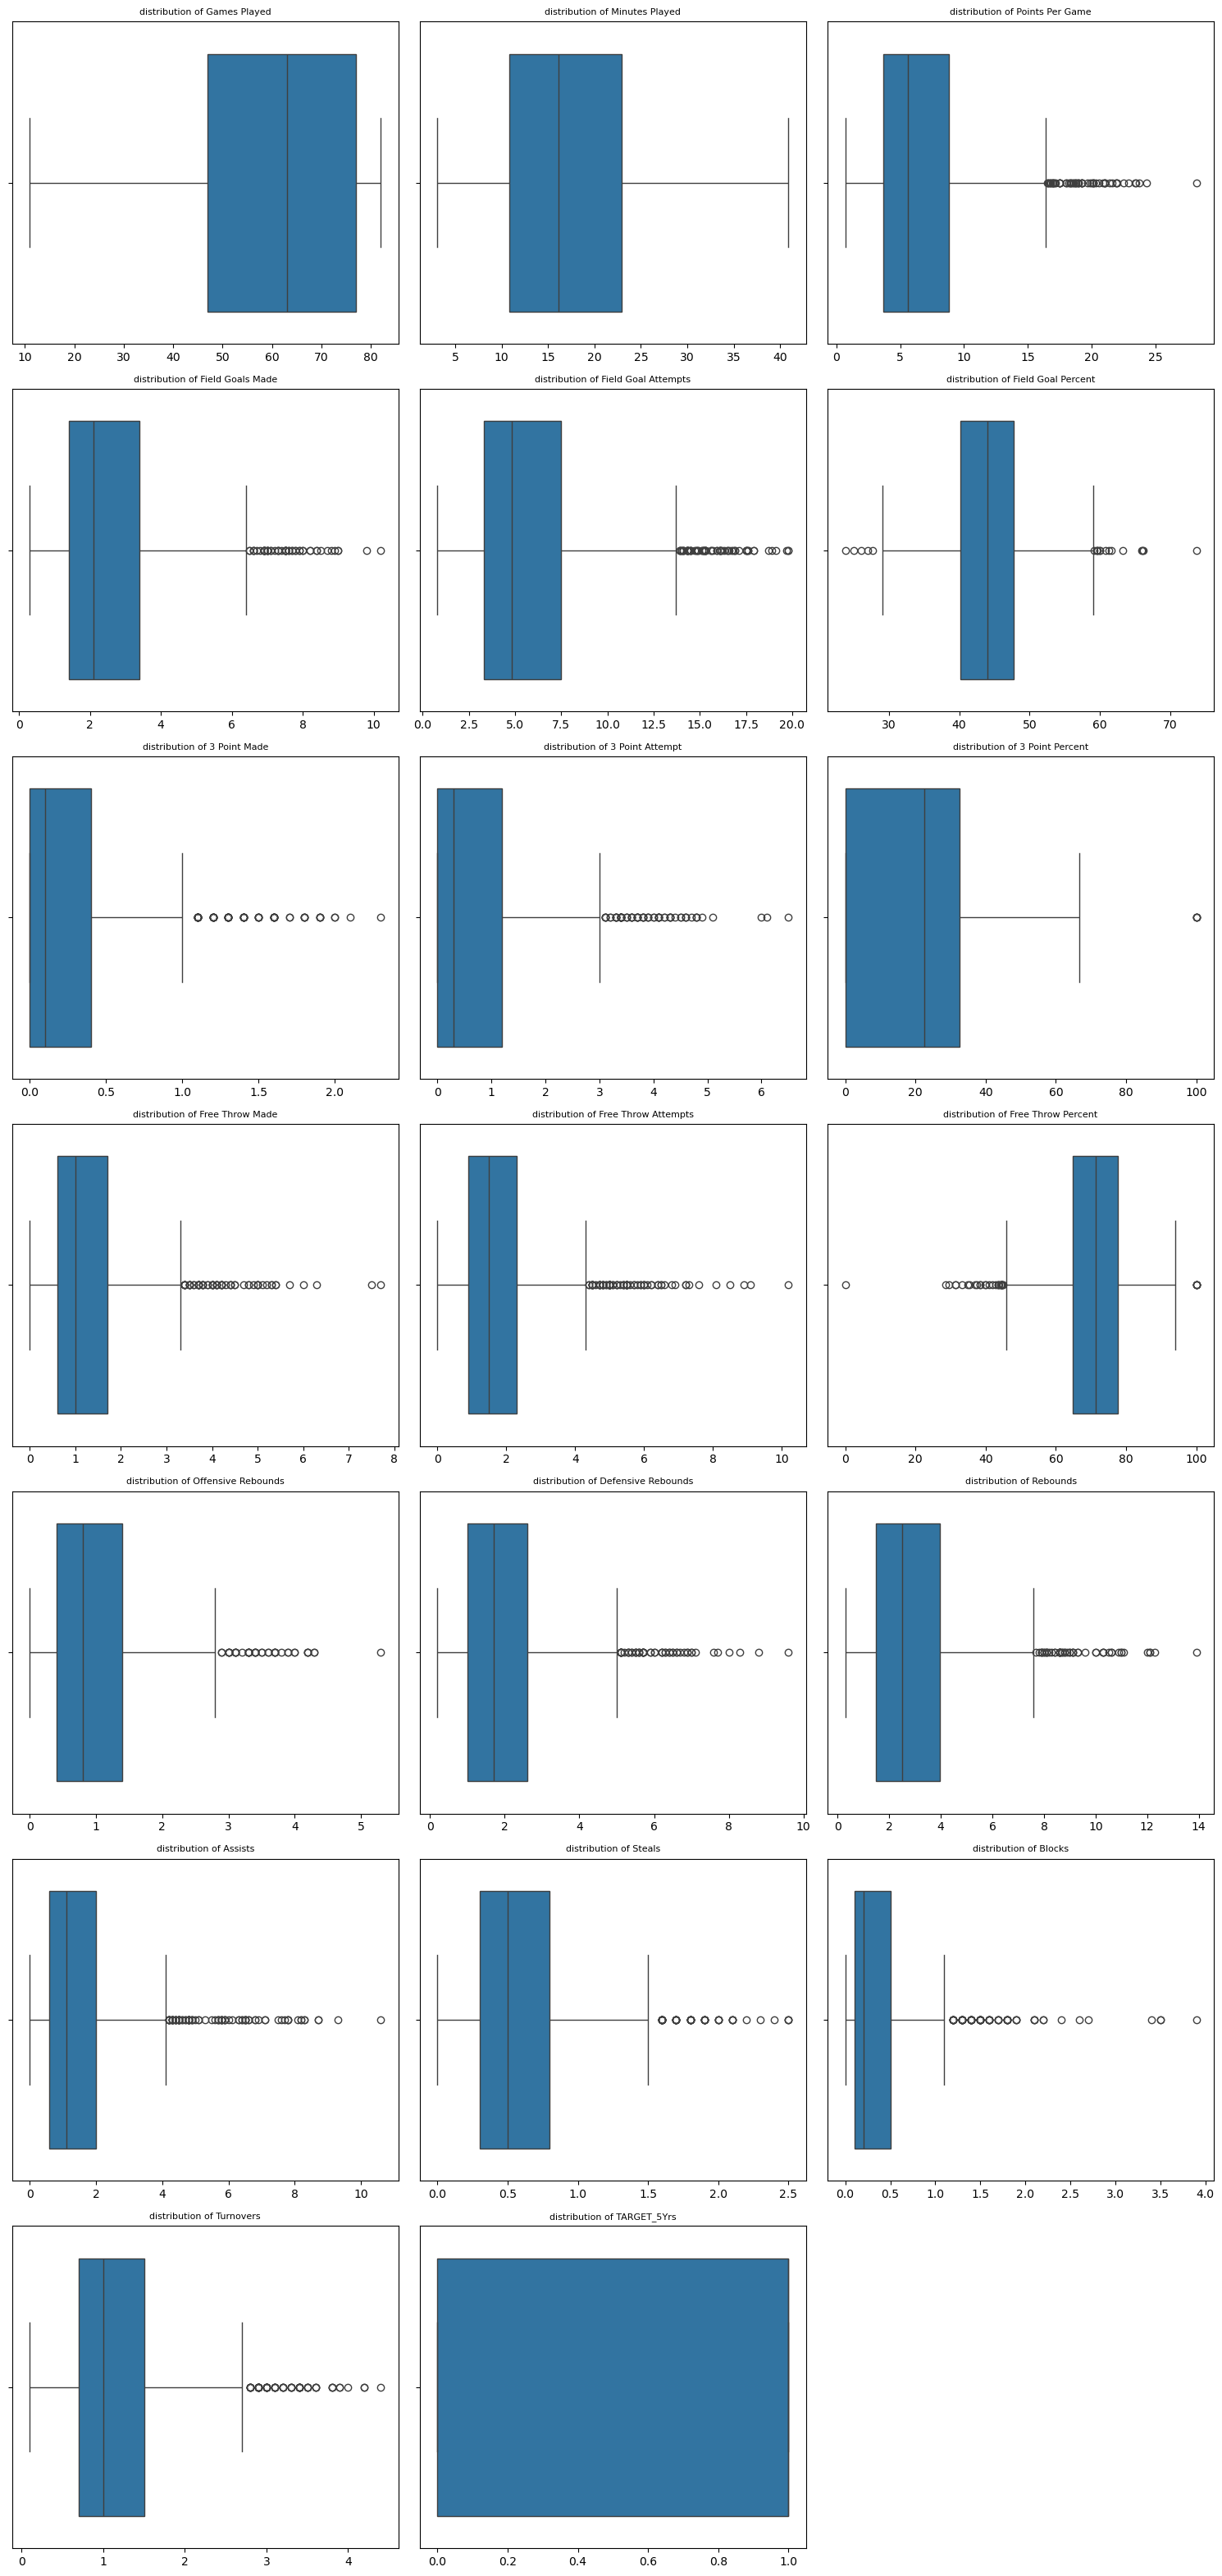

In [11]:
# Visualizing outliers
df = df.select_dtypes(include = 'number')
variables = [col for col in df.columns]

num_variables = len(variables)
cols = 3 
rows = (num_variables + cols -1) // cols

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (5* cols, 4.5 * rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.boxplot(x= df[col], ax=axes[i])
    axes[i].set_title(f"distribution of {col}", fontsize = 8)
    axes[i].set_xlabel("")

for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.show()

In [12]:
#Handling Outliers for Logistics Regression and GussanBayes
# Winsorization using IQR
# Compute IQR bounds again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap values
df = df.copy()
for col in df.columns:
    df[col] = df[col].clip(lower=lower_limit[col], upper=upper_limit[col])

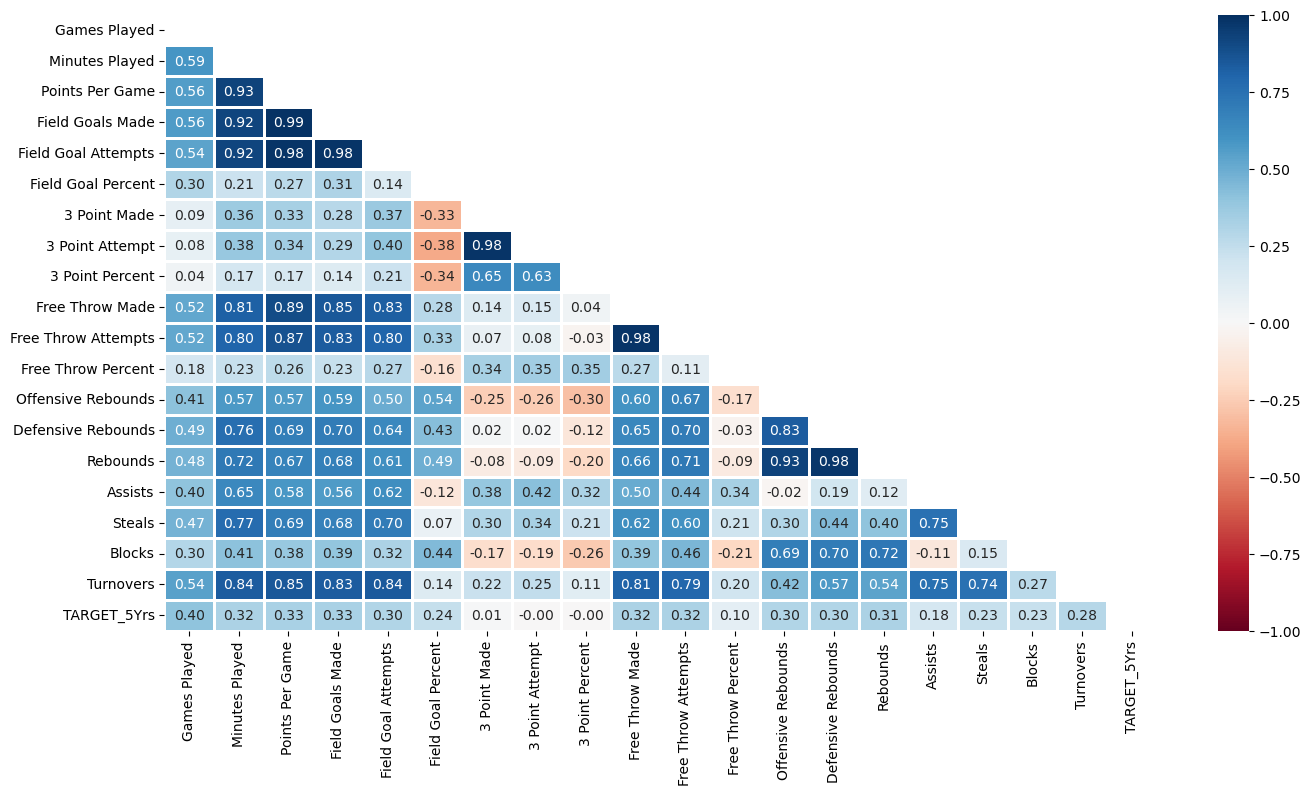

In [13]:
#correlation heatmap
plt.figure(figsize =(16, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

#### Machine Learning

##### To build this model, Simple features will be explored first compared with Logistics regression, Neural Network and GNB 

From the correlation matrix above: The correlation between target and most predicting features is moderate positive linear relationship(0.40) to no linear relationship (-0.00). <br>

The most correlated feature with target is Games played. Therefore, this will be explored first before subsequently adding more features.

In [14]:
X = df.iloc[:, [0]].values #input variable== Games playes
y = df.iloc[:, -1].values #target variable

In [15]:
#Standardizing this feature to improve model performance
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

##### Fitting training set on all 3 models and evaluating their performance

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training with Logistics Regression
logre = LogisticRegression(max_iter = 1000)
logre.fit(X_train, y_train)

# output the accuracy score
print('Logistics Regression')
print('Our Accuracy is %.2f' % logre.score(X_test, y_test))
# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

# Training with GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Accuracy score
print('Gaussian NB')
print('Our Accuracy is %.2f' % gnb.score(X_test, y_test))
# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

## Neural Network
mlp = MLPClassifier(hidden_layer_sizes = (), activation = 'relu', max_iter = 2000,
                   random_state = 42) 
mlp.fit(X_train,y_train)

#Accuracy Score
print('Neural Network')
print('Accuracy is %.2f' %mlp.score(X_test,y_test))
print('Number of mislabeled points out of a total %d points: %d'
      % (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Logistics Regression
Our Accuracy is 0.73
Number of mislabeled points out of a total 264 points : 71
Gaussian NB
Our Accuracy is 0.73
Number of mislabeled points out of a total 264 points : 71
Neural Network
Accuracy is 0.63
Number of mislabeled points out of a total 264 points: 98


##### With no hidden layers Neural network had more an accuracy of 72% and missed points 75 missed points when compared with other models 

##### Adding 5 hidden layers of 100,100, 100, 200, 40 did raise the accuracy to 73% and 71 missed point but took a bit longer to run. For now, hidden layers will be removed to ensure 

##### Visualizing what our model is learning

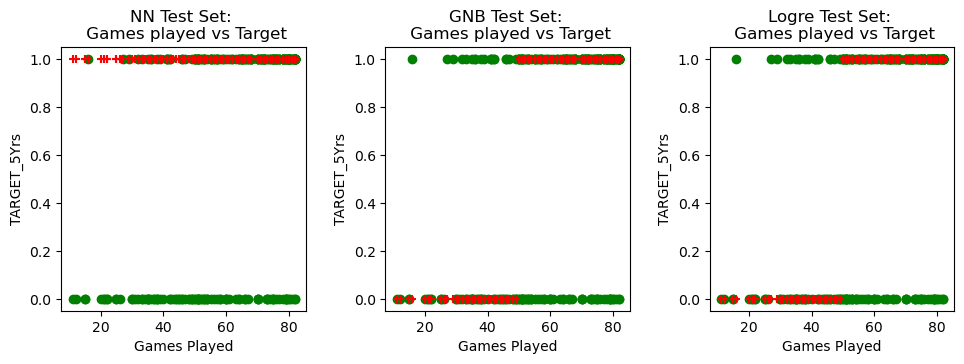

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (10, 4))

#Neural Network 
axes[0].scatter(X_test, y_test, color = 'green')
axes[0].scatter(X_test, mlp.predict(X_test), color = 'red', marker = '+')
axes[0].set_xlabel(df.columns[0])
axes[0].set_ylabel(df.columns[-1])
axes[0].set_title('NN Test Set: \n Games played vs Target')

#Guassian Bayes 
axes[1].scatter(X_test, y_test, color = 'green')
axes[1].scatter(X_test, gnb.predict(X_test), color = 'red', marker = '+')
axes[1].set_xlabel(df.columns[0])
axes[1].set_ylabel(df.columns[-1])
axes[1].set_title('GNB Test Set: \n Games played vs Target')

#Logistics Regression
axes[2].scatter(X_test, y_test, color = 'green')
axes[2].scatter(X_test, logre.predict(X_test), color = 'red', marker = '+')
axes[2].set_xlabel(df.columns[0])
axes[2].set_ylabel(df.columns[-1])
axes[2].set_title('Logre Test Set: \n Games played vs Target')

plt.tight_layout(pad =2.0)
plt.show()

#### The performance of our models:

##### From the visuals above, there is no clear distinction between the number of games played for those with career less than or more than 5 years. Overall the number of games played between both classes is fairly the same although there is an outlier with one person with over 5years of career with only about 20 games played. Ultimately we have more persons with less than 5 years of career as the clusters are closely for target 0.

##### Standarization improves the results of Neural networks, however, I have retained the original scale for ease of interpretation, we also have more missed points in NN

##### Next Step: adding more features- Points per game and field goals made 

In [18]:
X = df.iloc[:, [0, 2]].values #input variable== Games played and points per game
y = df.iloc[:, -1].values #target variable

In [19]:
#Standardizing games feature to improve model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

n_runs = 100 
accuracies = []

# Training with Logistics Regression
for i in range (n_runs):
    logre = LogisticRegression(max_iter = 1000)
    logre.fit(X_train, y_train)
    acc = logre.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))


# Training with GNB
for i in range (n_runs):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.73
Number of mislabeled points out of a total 264 points : 71
Average accuracy after 100 runs: 0.73
Number of mislabeled points out of a total 264 points : 73


In [21]:
n_runs = 100 
accuracies = []

# Training with NN
for i in range (n_runs):
    mlp = MLPClassifier(hidden_layer_sizes =(100), max_iter = 1000, activation = 'relu', random_state = 42)
    mlp.fit(X_train, y_train)
    acc = mlp.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.72
Number of mislabeled points out of a total 264 points : 73


##### No hidden layers: Accuracy 72% with 74 missed points
##### Adding hidden layers does take more time to run. In this case one hidden layer has been added and after 100 runs the missed point changed slightly

##### Visualization

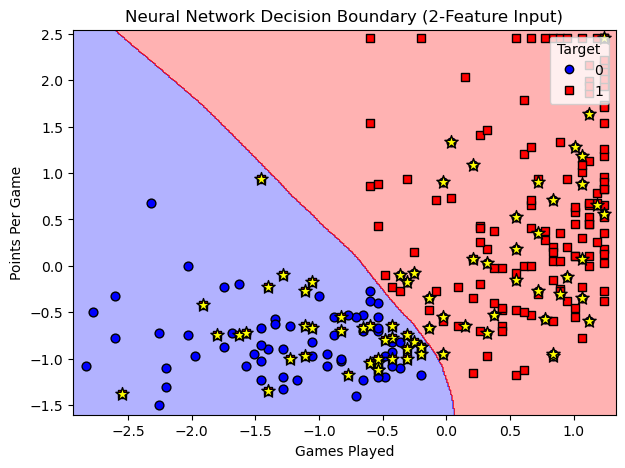

In [22]:
# --- Set distinct colors and markers ---
cm = ListedColormap(['blue', 'red'])  # blue for 0, red for 1
markers = ['o', 's']
colors = ['blue', 'red']

# Legend
points = [Line2D([0], [0], marker=m, color='w', markerfacecolor=c,
                 markeredgecolor='black', markersize=6, linestyle='')
          for m, c in zip(markers, colors)]
labels = ['0', '1']

# Set up meshgrid
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
h = 0.01
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                       np.arange(x2_min, x2_max, h))

#Predict on mesh 
Z = mlp.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

#Plot decision boundary and data
fig, ax = plt.subplots(figsize=(7,5))
ax.contourf(xx1, xx2, Z, cmap=cm, alpha=0.3)

# Plot the test points using their true class
for i, cls in enumerate(np.unique(y_test)):
    ax.scatter(X_test[y_test==cls, 0],
               X_test[y_test==cls, 1],
               c=colors[i], marker=markers[i],
               label=f'Class {cls}', edgecolor='k', s=40)

# Misclassified points
mis_ind = np.where(y_test != mlp.predict(X_test))[0]
ax.scatter(X_test[mis_ind, 0], X_test[mis_ind, 1],
           marker='*', color='yellow', edgecolor='black',
           s=100, label='Misclassified')

#Labels & Legend
ax.set_xlabel('Games Played')
ax.set_ylabel('Points Per Game')
ax.legend(handles=points, labels=labels, title='Target', loc='upper right')
plt.title("Neural Network Decision Boundary (2-Feature Input)")
plt.show()

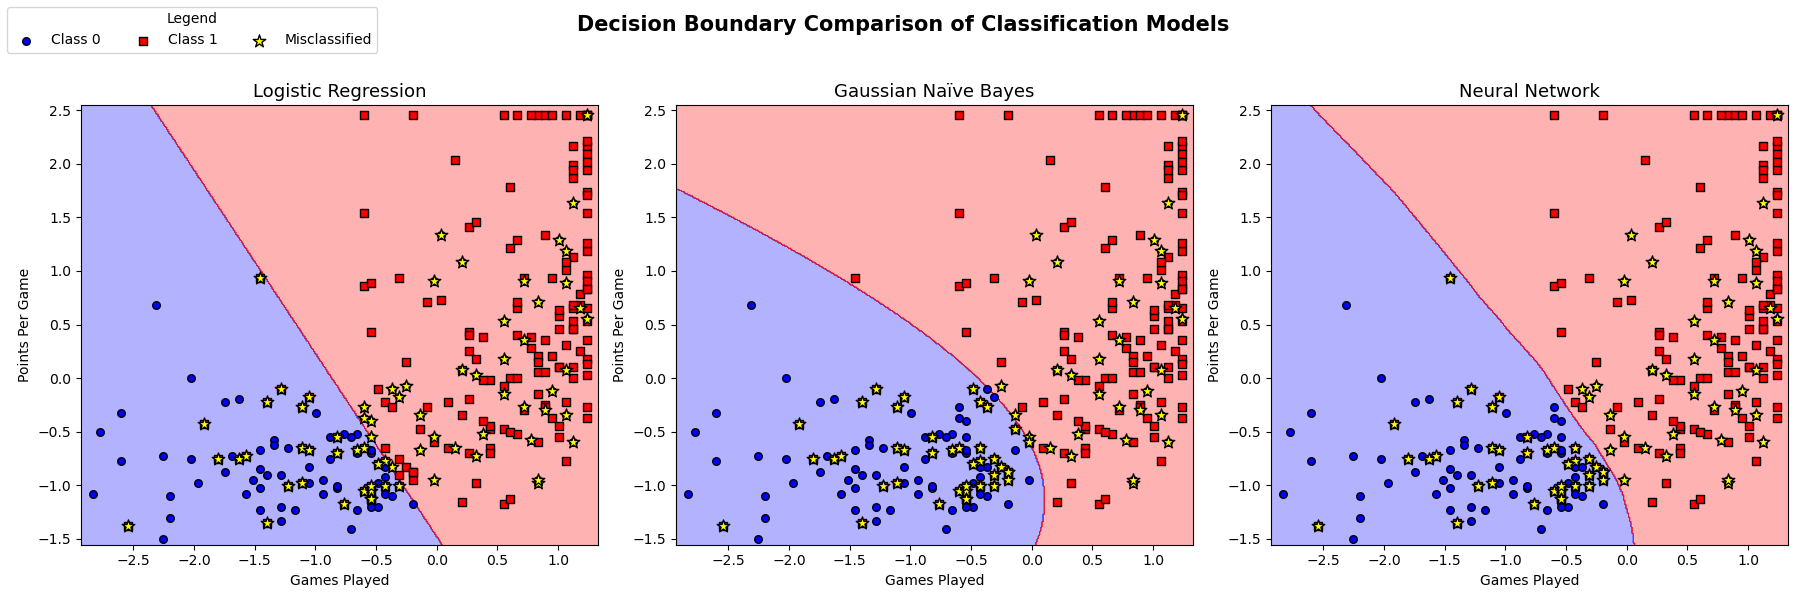

In [23]:
#  Consistent colors and style 
cm = ListedColormap(['blue', 'red'])  # blue & red
markers = ['o', 's']
colors = ['blue', 'red']
titles = ['Logistic Regression', 'Gaussian Naïve Bayes', 'Neural Network']

#  Mesh grid setup for all models
x1_min, x1_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
x2_min, x2_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
h = 0.01
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                       np.arange(x2_min, x2_max, h))

# Prepare models in a list
models = [logre, gnb, mlp]   # logre=LogisticRegression, gnb=GaussianNB, mlp=Neural Net
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, model, title in zip(axes, models, titles):

    # predict for each point in meshgrid
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # contour (decision boundary)
    ax.contourf(xx1, xx2, Z, cmap=cm, alpha=0.3)

    # scatter plot of true data
    for i, cls in enumerate(np.unique(y_test)):
        ax.scatter(X_test[y_test==cls, 0],
                   X_test[y_test==cls, 1],
                   c=colors[i], marker=markers[i],
                   label=f'Class {cls}', edgecolor='k', s=30)

    # misclassified points
    mis_ind = np.where(y_test != model.predict(X_test))[0]
    ax.scatter(X_test[mis_ind, 0], X_test[mis_ind, 1],
               marker='*', color='yellow', edgecolor='black',
               s=90, label='Misclassified')

    # labels & title
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('Games Played')
    ax.set_ylabel('Points Per Game')

# avoid duplicate legends on every subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=4, title='Legend')

plt.suptitle("Decision Boundary Comparison of Classification Models", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### By adding the points per game to our modelling. Although the accuracy score of our Model was not significantly better adding more features helps our model generate more useful insight beyond the number of games played. 

##### Logistic regression consistent with its linear assumption tried to classify target and the result indicates that those with fewer games played regardless of their points per game will have a career less than 5 years. Conversely, those who have played more games will build careers up to and beyond 5 years.

##### Gaussian Naive Bayes: Assumes a 'naive' assumption that each feature follows a normal distribution. Based on this model, it has also made predictions that players with lesser number of games played with the total point per game less than 1 will have careers < 5 years while those above this range will have above 5years. some missedpoints were also correctly captured such as the games at -1.0, and points at 1.0

##### Neural network followed a non-linear pattern similar to that of the logistic regression decision boundary

##### Adding more features to help the accuracy of the model

##### Modeling with Features in Groups
##### Group 1: Games Played, Minutes Played, Points Per Game, Field Goals Made, Field Goal Attempts, Field Goal Percent 

In [24]:
X = df.iloc[:, [0,1,2,3,4,5]].values #input variable
y = df.iloc[:, -1].values #target variable

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

n_runs = 100 
accuracies = []

# Training with Logistics Regression
for i in range (n_runs):
    logre = LogisticRegression(max_iter = 1000)
    logre.fit(X_train, y_train)
    acc = logre.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

# Training with GNB
for i in range (n_runs):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.69
Number of mislabeled points out of a total 264 points : 81
Average accuracy after 100 runs: 0.66
Number of mislabeled points out of a total 264 points : 98


In [26]:
# Training with NN
for i in range (n_runs):
    mlp = MLPClassifier(hidden_layer_sizes =(100), max_iter = 1000, activation = 'relu')
    mlp.fit(X_train, y_train)
    acc = mlp.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.67
Number of mislabeled points out of a total 264 points : 82


Text(0.5, 1.0, 'Confusion Matrix for MLP Classifier')

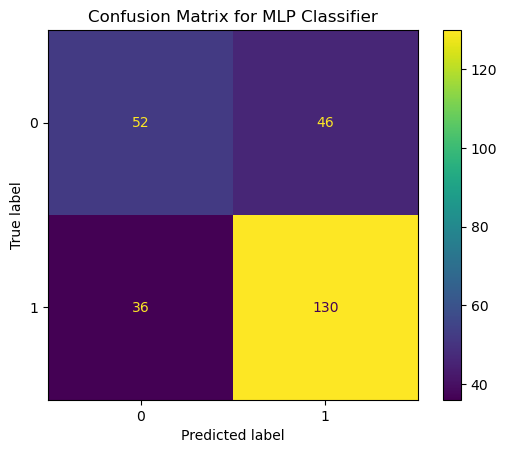

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, mlp.predict(X_test))

plt.title('Confusion Matrix for MLP Classifier')

##### Group 2: Free ThrowMade, Free ThrowAttempts, Free Throw Percent, Offensive Rebounds, Defensive Rebounds

In [28]:
X = df.iloc[:, [9,10,11,12,13]].values #input variable
y = df.iloc[:, -1].values #target variable

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

n_runs = 100 
accuracies = []

# Training with Logistics Regression
for i in range (n_runs):
    logre = LogisticRegression(max_iter = 1000)
    logre.fit(X_train, y_train)
    acc = logre.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

# Training with GNB
for i in range (n_runs):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.73
Number of mislabeled points out of a total 264 points : 72
Average accuracy after 100 runs: 0.69
Number of mislabeled points out of a total 264 points : 91


In [30]:
# Training with NN
for i in range (n_runs):
    mlp = MLPClassifier(hidden_layer_sizes =(10, 10, 10), max_iter = 1000, activation = 'relu', random_state = 40)
    mlp.fit(X_train, y_train)
    acc = mlp.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.70
Number of mislabeled points out of a total 264 points : 76


Text(0.5, 1.0, 'Confusion Matrix for Neural Network Classifier')

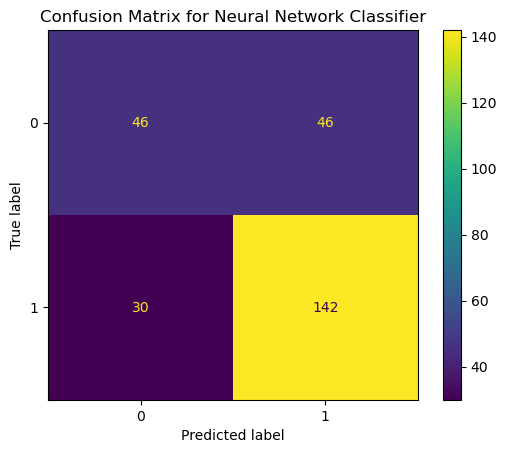

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, mlp.predict(X_test))

plt.title('Confusion Matrix for Neural Network Classifier')

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict using your test set
y_pred = mlp.predict(X_test)

# Calculate individually
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Optional: show the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Or get a full summary in one line:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.755
Recall: 0.826
F1-score: 0.789

Confusion Matrix:
 [[ 46  46]
 [ 30 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.50      0.55        92
           1       0.76      0.83      0.79       172

    accuracy                           0.71       264
   macro avg       0.68      0.66      0.67       264
weighted avg       0.70      0.71      0.70       264



In [32]:
X = df.iloc[:, [14,15,16,17,18]].values #input variable
y = df.iloc[:, -1].values #target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

n_runs = 100 
accuracies = []

# Training with Logistics Regression
for i in range (n_runs):
    logre = LogisticRegression(max_iter = 1000)
    logre.fit(X_train, y_train)
    acc = logre.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

# Training with GNB
for i in range (n_runs):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

#Training with NN
for i in range (n_runs):
    mlp = MLPClassifier(hidden_layer_sizes =(100), max_iter = 1000, activation = 'relu', random_state = i)
    mlp.fit(X_train, y_train)
    acc = mlp.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.70
Number of mislabeled points out of a total 264 points : 78
Average accuracy after 100 runs: 0.67
Number of mislabeled points out of a total 264 points : 95
Average accuracy after 100 runs: 0.68
Number of mislabeled points out of a total 264 points : 79


##### Group 3: Rebounds, Assists, Steals, Blocks, Turnovers 

##### Working with 8 features for modelling 

In [33]:
X = df.iloc[:, [0,2,3,14,15,16,17,18]].values #input variable
y = df.iloc[:, -1].values #target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)

n_runs = 100 
accuracies = []

# Training with Logistics Regression
for i in range (n_runs):
    logre = LogisticRegression(max_iter = 1000)
    logre.fit(X_train, y_train)
    acc = logre.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

# Training with GNB
for i in range (n_runs):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.73
Number of mislabeled points out of a total 396 points : 105
Average accuracy after 100 runs: 0.69
Number of mislabeled points out of a total 396 points : 139


In [35]:
#Training with NN
for i in range (n_runs):
    mlp = MLPClassifier(hidden_layer_sizes =(20, 30), max_iter = 2000, activation = 'relu', random_state = 42)
    mlp.fit(X_train, y_train)
    acc = mlp.score(X_test, y_test)
    accuracies.append(acc)

avg_accuracy = np.mean(accuracies)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Average accuracy after 100 runs: 0.66
Number of mislabeled points out of a total 396 points : 146


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict using your test set
y_pred = gnb.predict(X_test)

# Calculate individually
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Optional: show the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Or get a full summary in one line:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.840
Recall: 0.570
F1-score: 0.679

Confusion Matrix:
 [[110  28]
 [111 147]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.80      0.61       138
           1       0.84      0.57      0.68       258

    accuracy                           0.65       396
   macro avg       0.67      0.68      0.65       396
weighted avg       0.72      0.65      0.66       396



Text(0.5, 1.0, 'Confusion Matrix for GNB Classifier')

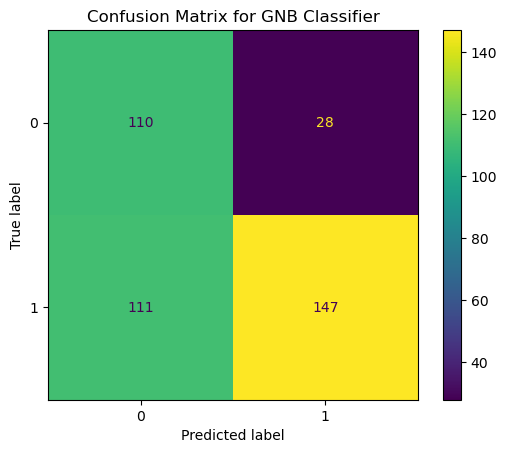

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, gnb.predict(X_test))

plt.title('Confusion Matrix for GNB Classifier')